## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import spearmanr
import statsmodels.stats.diagnostic as diag
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from scipy.stats import normaltest
import statsmodels.api as sm
import sklearn.metrics as metrics

random_state = 42

C:\Users\agria\AppData\Local\Temp\ipykernel_2620\1632686426.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Data Upload

In [2]:
df = pd.read_csv('./Data/train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## Exploratory Analysis

### Variable Categorization

#### **Numerical**

`Continuous`: LotFrontage, LotArea, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, SalePrice

`Discrete`: Id, MSSubClass, OverallQual, OverallCond, YearBuilt, YearRemodAdd, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageCars, MoSold, YrSold

#### **Categorical**
`Nominal`: MSZoning, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, Foundation, Heating, CentralAir, Electrical, GarageType, MiscFeature, SaleType, SaleCondition

`Ordinal`: ExterQual, ExterCond, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, HeatingQC, KitchenQual, Functional, FireplaceQu, GarageFinish, GarageQual, GarageCond, PavedDrive, PoolQC, Fence

### Descriptive Statistics

#### General Information of DF

In [3]:
df.shape

(1460, 81)

Se inicia con un breve análisis de la magnitud del conjunto de datos. Se observa que consta de 1,460 registros y abarca 81 columnas o características distintas.

In [4]:
df_describe = df.loc[:, df.columns != 'Id']
df_describe.describe(include=[np.number])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


En el resumen estadístico, se puede notar la presencia de valores atípicos en ciertas características, como en el caso de LotFrontage, donde el valor máximo es de 215,245 y la desviación estándar es de 9,981. Es algo que sin duda se debe de tomar en consideración para realizar el modelo de regresión lineal.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Variable Distribution Type

In [6]:
df_numerical = df_describe.select_dtypes(include=[np.number])
df_numerical

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


In [7]:
df_numerical_cp = df_numerical
for column in df_numerical_cp:
    colData = df_numerical_cp[column].dropna()
    stat, p_value = diag.lilliefors(colData.values)
    if p_value <= 0.05:
        print(f'{column}: Does not follow a normal distribution.')
    else:
        print(f'{column}: Follows a normal distribution.')

MSSubClass: Does not follow a normal distribution.
LotFrontage: Does not follow a normal distribution.
LotArea: Does not follow a normal distribution.
OverallQual: Does not follow a normal distribution.
OverallCond: Does not follow a normal distribution.
YearBuilt: Does not follow a normal distribution.
YearRemodAdd: Does not follow a normal distribution.
MasVnrArea: Does not follow a normal distribution.
BsmtFinSF1: Does not follow a normal distribution.
BsmtFinSF2: Does not follow a normal distribution.
BsmtUnfSF: Does not follow a normal distribution.
TotalBsmtSF: Does not follow a normal distribution.
1stFlrSF: Does not follow a normal distribution.
2ndFlrSF: Does not follow a normal distribution.
LowQualFinSF: Does not follow a normal distribution.
GrLivArea: Does not follow a normal distribution.
BsmtFullBath: Does not follow a normal distribution.
BsmtHalfBath: Does not follow a normal distribution.
FullBath: Does not follow a normal distribution.
HalfBath: Does not follow a nor

Es importante destacar que ninguna de las variables muestra una distribución normal. Esta observación debe considerarse cuidadosamente al realizar el análisis de correlación entre las diferentes características del conjunto de datos.

#### Frequency Tables

In [8]:
for column in df.columns:
    if df[column].dtype != 'O' and column != 'MSSubClass':
        continue

    freqTable = df[column].value_counts().reset_index()

    freqTable.columns = [column, 'Frequency']

    # Table formatting
    freqTable[column] = freqTable[column].astype(str).str.center(20)
    freqTable['Frequency'] = freqTable['Frequency'].astype(str).str.center(20)
    freqTable.columns = [col.center(20) for col in freqTable.columns]

    print(f"Frequency Table for {column}:\n{freqTable}\n")

Frequency Table for MSSubClass:
         MSSubClass            Frequency      
0            20                   536         
1            60                   299         
2            50                   144         
3           120                    87         
4            30                    69         
5           160                    63         
6            70                    60         
7            80                    58         
8            90                    52         
9           190                    30         
10           85                    20         
11           75                    16         
12           45                    12         
13          180                    10         
14           40                    4          

Frequency Table for MSZoning:
         MSZoning             Frequency      
0           RL                   1151        
1           RM                   218         
2           FV                    65         
3

#### NaN Value Analysis

In [9]:
nullValues = df.isnull().sum()
nullValues = nullValues[nullValues > 0]
print("Columns with NaN values:")
print(nullValues)

Columns with NaN values:
LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


Es relevante señalar que dentro del conjunto de datos, hay características que contienen una gran cantidad de valores nulos, mientras que otras presentan una proporción mínima de NaNs en comparación al total de registros. Lo anterior es algo que determinará cómo se manejará la data faltante.

### Correlation and Relationships

In [10]:
#label_encoder = preprocessing.LabelEncoder()
salePriceData = df['SalePrice']
df_numerical_cp = df.loc[:, df.columns != 'Id']
df_numerical_cp = df_numerical_cp.select_dtypes(include=[np.number])

for col in df_numerical_cp.columns:
    colData = df_numerical_cp[col]
    corr, p_value = spearmanr(salePriceData, colData)
    if corr >= 0.45:
        print(f"Column '{col}' spearman correlation coefficient:", corr)

Column 'LotArea' spearman correlation coefficient: 0.45646058339121154
Column 'OverallQual' spearman correlation coefficient: 0.8098285862017292
Column 'YearBuilt' spearman correlation coefficient: 0.6526815462850586
Column 'YearRemodAdd' spearman correlation coefficient: 0.5711589780582342
Column 'TotalBsmtSF' spearman correlation coefficient: 0.6027254448924096
Column '1stFlrSF' spearman correlation coefficient: 0.5754078354212824
Column 'GrLivArea' spearman correlation coefficient: 0.7313095834659141
Column 'FullBath' spearman correlation coefficient: 0.6359570562496957
Column 'TotRmsAbvGrd' spearman correlation coefficient: 0.5325859351169929
Column 'Fireplaces' spearman correlation coefficient: 0.5192474498367013
Column 'GarageCars' spearman correlation coefficient: 0.6907109670497434
Column 'GarageArea' spearman correlation coefficient: 0.6493785338868229
Column 'OpenPorchSF' spearman correlation coefficient: 0.4775606622825264
Column 'SalePrice' spearman correlation coefficient:

En el análisis anterior, se ha considerado únicamente aquellas características del conjunto de datos cuya correlación lineal con la variable respuesta (Sale Price) supere 0.50, lo que indica una correlación fuerte. Notar que se ha implementado el uso de Spearman dado que las variables no tienen una distribución normal.

### Data visualization

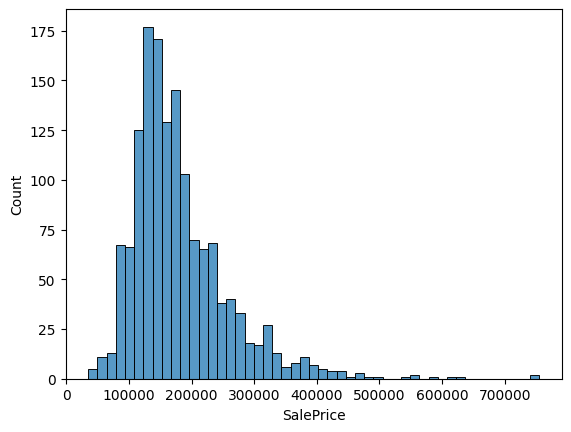

In [11]:
sns.histplot(x='SalePrice', data=df, )
plt.show()

Como se había identificado desde el principio, parece haber datos atípicos en la columna de Precio de Venta.

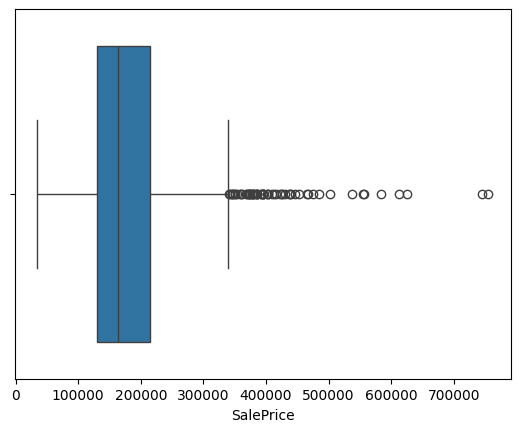

In [12]:
sns.boxplot(x='SalePrice', data=df, )
plt.show()

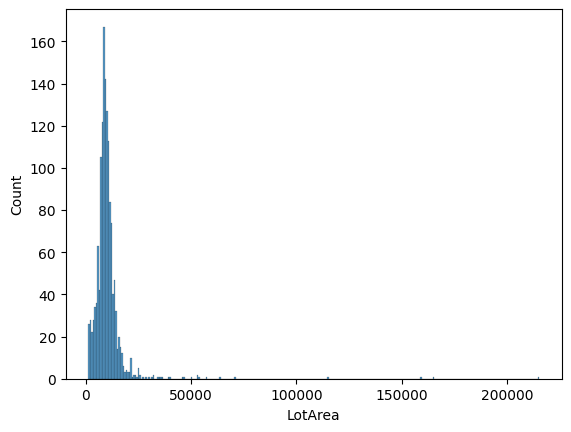

In [13]:
sns.histplot(x='LotArea', data=df, )
plt.show()

Se observa que otra columna que presenta valores atípicos es LotArea, lo que podría llevar a puntos palanca. Es relevante mencionar que solo se han graficado estas dos variables, siendo la primera la variable de respuesta y la segunda se considera de gran importancia para la regresión lineal.

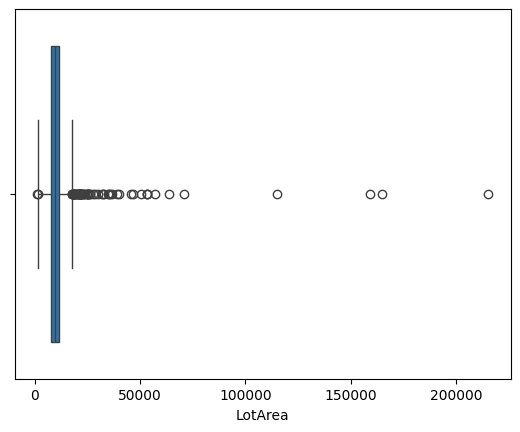

In [14]:
sns.boxplot(x='LotArea', data=df, )
plt.show()

## Data Preprocessing

### Handling Missing Values

In [15]:
# Remove rows with missing values in 'MasVnrType', 'MasVnrArea', and 'Electrical' columns.
df.dropna(subset=['MasVnrType', 'MasVnrArea', 'Electrical'], inplace=True)

Para las columnas con un número muy reducido de registros nulos, como MasVnrType, MasVnrArea y Electrical, se ha optado por eliminar los registros nulos, dado que representan menos del 1% del conjunto de datos y su eliminación no afecta significativamente este.

In [16]:
# Impute missing LotFrontage values based on the median LotFrontage within each neighborhood.
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

C:\Users\agria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


El problema de los datos faltantes en LotFrontage se abordó de manera diferente. Durante el análisis, se observó que esta variable está relacionada con el vecindario (Neighborhood). Por lo tanto, se agruparon los datos según el vecindario y se calculó la media para aquellos registros con valores faltantes.

In [17]:
# Fill missing values in FireplaceQu with 'None'.
df['FireplaceQu'].fillna('None', inplace=True)

C:\Users\agria\AppData\Local\Temp\ipykernel_2620\1886748092.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['FireplaceQu'].fillna('None', inplace=True)


In [18]:
# Fill missing values in garage-related variables with 'None'.
df['GarageType'].fillna('None', inplace=True)
df['GarageYrBlt'].fillna('None', inplace=True)
df['GarageFinish'].fillna('None', inplace=True)
df['GarageQual'].fillna('None', inplace=True)
df['GarageCond'].fillna('None', inplace=True)

C:\Users\agria\AppData\Local\Temp\ipykernel_2620\711302466.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GarageType'].fillna('None', inplace=True)
C:\Users\agria\AppData\Local\Temp\ipykernel_2620\711302466.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

In [19]:
# Fill missing values in basement-related variables with 'None'.
df['BsmtQual'].fillna('None', inplace=True)
df['BsmtCond'].fillna('None', inplace=True)
df['BsmtExposure'].fillna('None', inplace=True)
df['BsmtFinType1'].fillna('None', inplace=True)
df['BsmtFinType2'].fillna('None', inplace=True)

C:\Users\agria\AppData\Local\Temp\ipykernel_2620\1267149368.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BsmtQual'].fillna('None', inplace=True)
C:\Users\agria\AppData\Local\Temp\ipykernel_2620\1267149368.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

Para todas estas variables, se ha optado por crear un nuevo campo con el valor "None".

In [20]:
# Drop columns with a high count of missing values
df.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)

Finalmente, se ha decidido eliminar por completo las columnas Alley, PoolQC, Fence y MiscFeature, debido a que contienen casi un 70% de datos faltantes. Dado su escaso aporte y la cantidad significativa de datos faltantes, la opción lógica es desechar estas columnas por completo.

### Encoding

In [21]:
nominalFeatures = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
                    'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
                    'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
                    'Heating', 'CentralAir', 'Electrical', 'GarageType', 'SaleType',
                    'SaleCondition','PavedDrive']

ordinalFeatures = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual','FireplaceQu',
                    'GarageQual', 'GarageCond']

otherOrdinalFeatures = ['BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Functional', 'GarageFinish']


In [22]:
df = pd.get_dummies(df, columns = nominalFeatures)

In [23]:
ordinalCategories = [['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'] for _ in ordinalFeatures]

ordinalEncoder = OrdinalEncoder(categories=ordinalCategories)
ordinalEncoded = ordinalEncoder.fit_transform(df[ordinalFeatures])

for i, feature in enumerate(ordinalFeatures):
    df[feature] = ordinalEncoded[:, i]

In [24]:
encodingCategories = [
    ['None', 'No', 'Mn', 'Av', 'Gd'],  # BsmtExposure
    ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],  # BsmtFinType1
    ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],  # BsmtFinType2
    ['Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'], # Functional
    ['None', 'Unf', 'RFn', 'Fin']  # GarageFinish
]

ordinalEncoder = OrdinalEncoder(categories=encodingCategories)
ordinalEncoded = ordinalEncoder.fit_transform(df[otherOrdinalFeatures])

for i, feature in enumerate(otherOrdinalFeatures):
    df[feature] = ordinalEncoded[:, i]

En esta sección se realizan varias operaciones de preprocesamiento de datos para manejar variables categóricas. En primer lugar, las características nominales se convierten en variables ficticias (dummy variables) utilizando la función 'get_dummies()' de pandas. Luego, las características ordinales se codifican utilizando la clase 'OrdinalEncoder' de sklearn, especificando las categorías de cada característica en 'ordinalCategories'. Similarmente, otras características ordinales se codifican utilizando 'OrdinalEncoder' con categorías específicas en 'encodingCategories', y luego se asignan los valores codificados al DataFrame original. Este proceso es importante para preparar los datos categóricos para su uso en el modelo de regresión lineal dado que este no entiende texto.

### Splitting DataSet

In [25]:
df_cp = df.copy()
y = df_cp.pop('SalePrice')
X = df_cp

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=random_state)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=random_state)

In [27]:
print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)

(423, 191)
(118, 191)
(47, 191)


Es aquí donde se realiza la división del conjunto de datos en conjuntos de entrenamiento, validación y prueba. Importante notar que el conjunto de prueba representará el 20% del conjunto de datos original, mientras que el conjunto de entrenamiento representará el 80%. Además, se especifica que el conjunto de validación representará el 10% del conjunto de entrenamiento. Al final esta partición resulta en 291 registros para test, 1043 para train y de esos 116 para validar el modelo. Se decidió tomar este camino dado que solo se cuentan con 1430 registros.


### Feature Engineering

In [28]:
X_train_cp = X_train.copy()
X_valid_cp = X_valid.copy()

y_train_cp = y_train.copy()
y_valid_cp = y_valid.copy()

#### Feature Creation

In [29]:
X_train_cp['HouseAge'] = X_train_cp['YrSold'] - X_train_cp['YearBuilt']
X_train_cp['TotalFullBathrooms'] = X_train_cp['FullBath'] + X_train_cp['BsmtFullBath']
X_train_cp['TotalHalfBathrooms'] = X_train_cp['BsmtHalfBath'] + X_train_cp['HalfBath']

X_valid_cp['HouseAge'] = X_valid_cp['YrSold'] - X_valid_cp['YearBuilt']
X_valid_cp['TotalFullBathrooms'] = X_valid_cp['FullBath'] + X_valid_cp['BsmtFullBath']
X_valid_cp['TotalHalfBathrooms'] = X_valid_cp['BsmtHalfBath'] + X_valid_cp['HalfBath']

En esta etapa del pre-procesamiento de la data se crean nuevas características (features) para mejorar el conjunto de datos y potencialmente mejorar el rendimiento del modelo lineal.

    'HouseAge': Proporciona la antigüedad de la casa en el momento de la venta.
    'TotalFullBathrooms': Total de baños completos en la propiedad.
    'TotalHalfBathrooms': Total de baños medios en la propiedad.

#### Feature Selection

In [30]:
columnNames = ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea',
               'HouseAge', 'TotalFullBathrooms', 'TotalHalfBathrooms']

X_train_cp = selected_columns = X_train_cp.loc[:, columnNames]

Estos features fueron seleccionados como un primer enfoque debido a que durante la etapa de análisis exploratorio se encontró que mostraban la mayor correlación con la variable respuesta.

## Linear Regressions

### Validation-Only

#### Univariate linear regression

In [31]:
salePrice = y_train_cp.values.reshape(-1,1)
salePrice_v = y_valid_cp.values.reshape(-1,1)

bestR = -1
bestModel = None
bestCol = None
salePrice_p = None
colValidation = None

for col in columnNames:
    X_train_col = X_train_cp[col].values.reshape(-1, 1)
    X_valid_col = X_valid_cp[col].values.reshape(-1, 1)

    lm = LinearRegression()
    lm.fit(X_train_col, salePrice)
    salePrice_pred = lm.predict(X_valid_col)

    r_squared = r2_score(salePrice_v, salePrice_pred)

    if r_squared > bestR:
        bestR = r_squared
        bestModel = lm
        bestCol = col
        salePrice_p = salePrice_pred
        colValidation = X_valid_col

    m = lm.coef_[0][0]
    c = lm.intercept_[0]
    label = r'$salePrice = %0.4f*%s %+0.4f$' % (m, col, c)
    print(label)
    print("Mean Squared Error for", col, ": %.2f" % mean_squared_error(salePrice_v, salePrice_pred))
    print("R squared for", col, ": %.2f" % r_squared)
    print()

$salePrice = 51064.6699*OverallQual -130425.3136$
Mean Squared Error for OverallQual : 3608501966.57
R squared for OverallQual : 0.63

$salePrice = 2390.2629*YearBuilt -4534288.9317$
Mean Squared Error for YearBuilt : 7889101506.03
R squared for YearBuilt : 0.19

$salePrice = 2487.7879*YearRemodAdd -4738295.9797$
Mean Squared Error for YearRemodAdd : 8316370824.06
R squared for YearRemodAdd : 0.14

$salePrice = 87.3747*TotalBsmtSF +107101.0172$
Mean Squared Error for TotalBsmtSF : 6183351845.78
R squared for TotalBsmtSF : 0.36

$salePrice = 101.3149*1stFlrSF +81727.7228$
Mean Squared Error for 1stFlrSF : 6504422012.04
R squared for 1stFlrSF : 0.33

$salePrice = 103.6655*GrLivArea +41644.7993$
Mean Squared Error for GrLivArea : 5160447660.05
R squared for GrLivArea : 0.47

$salePrice = 92058.2193*FullBath +53836.4477$
Mean Squared Error for FullBath : 6705134980.12
R squared for FullBath : 0.31

$salePrice = 29860.5062*TotRmsAbvGrd +9372.4255$
Mean Squared Error for TotRmsAbvGrd : 59058

El mejor modelo de regresión lineal univariable encontrado se construyó utilizando la variable 'OverallQual'. Los resultados del modelo son los siguientes:

```
$salePrice = 44913.0081*OverallQual -92991.0166$
Mean Squared Error for OverallQual : 1630450142.75
R squared for OverallQual : 0.74
```

El coeficiente de determinación (R cuadrado) para 'OverallQual' es 0.74, lo que sugiere que aproximadamente el 74% de la variabilidad en el precio de venta puede ser explicada por la variable 'OverallQual'. Esto indica que 'OverallQual' es una característica significativa para predecir el precio de venta de las viviendas. Importante destacar que hasta este punto el modelo aún no ha visto los datos de test, por lo que proporciona una evaluación más imparcial de su capacidad para generalizar.


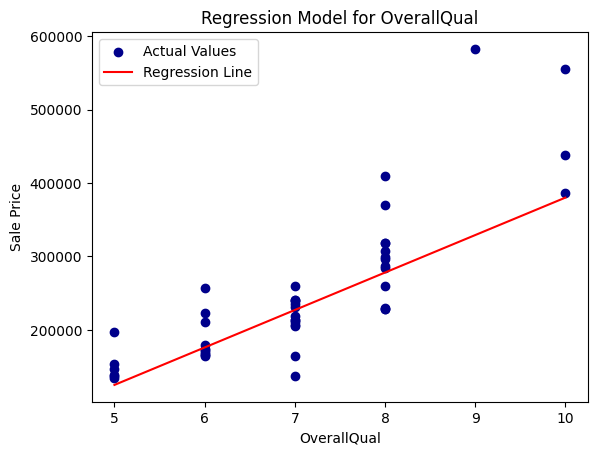

In [32]:
plt.scatter(colValidation, salePrice_v, color='darkblue', label='Actual Values')

sorted_order = np.argsort(colValidation.ravel())
plt.plot(colValidation[sorted_order], salePrice_p[sorted_order], color='red', label='Regression Line')

plt.title(f'Regression Model for {bestCol}')
plt.xlabel(bestCol)
plt.ylabel('Sale Price')
plt.legend()
plt.show()

Text(0, 0.5, 'Residuals')

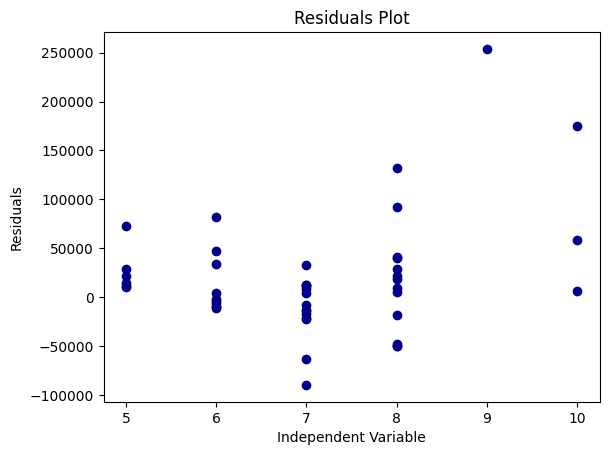

In [33]:
residuals = salePrice_v - salePrice_p

plt.plot(colValidation, residuals, 'o', color='darkblue')
plt.title("Residuals Plot")
plt.xlabel("Independent Variable")
plt.ylabel("Residuals")

Text(0.5, 1.0, 'Residuals')

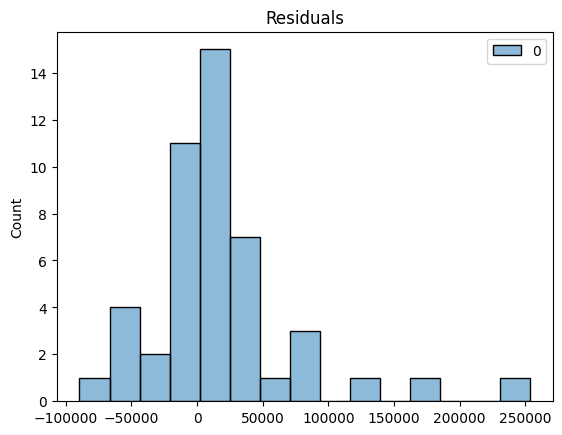

In [34]:
sns.histplot(residuals);
plt.title("Residuals")

{'whiskers': [<matplotlib.lines.Line2D at 0x24f15262960>,
 'caps': [<matplotlib.lines.Line2D at 0x24f1735aa50>,
 'boxes': [<matplotlib.lines.Line2D at 0x24f1735a480>],
 'medians': [<matplotlib.lines.Line2D at 0x24f1735afc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x24f1735b230>],
 'means': []}

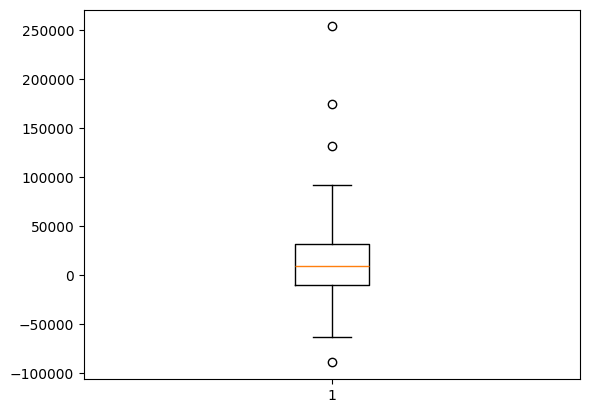

In [35]:
plt.boxplot(residuals)

In [36]:
normaltest(residuals)

NormaltestResult(statistic=array([32.06206516]), pvalue=array([1.09096548e-07]))

Dado que el valor p es extremadamente bajo (cerca de 0), sugiere evidencia sólida en contra de la hipótesis nula de normalidad. Por lo tanto, basándonos en este resultado, rechazaríamos la suposición de que los datos siguen una distribución normal.

#### Multivariate linear regression

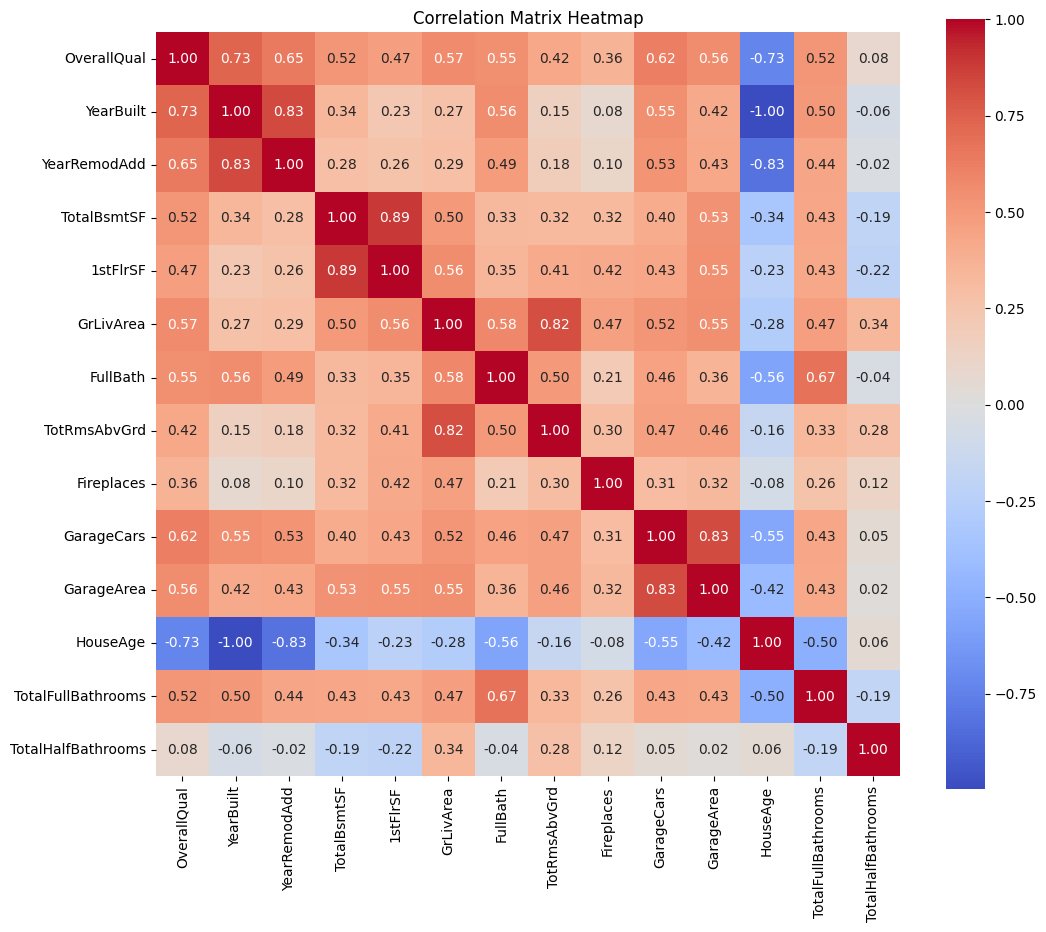

In [37]:
corrMatrix = X_train_cp.corr()
tidy_corr_matrix = corrMatrix.reset_index().melt(id_vars='index').rename(columns={'index': 'Variable 1', 'variable': 'Variable 2', 'value': 'Correlation'})
tidy_corr_matrix = tidy_corr_matrix[tidy_corr_matrix['Variable 1'] != tidy_corr_matrix['Variable 2']]

plt.figure(figsize=(12, 10))
sns.heatmap(corrMatrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

Se observa una alta correlación entre ciertas variables o características de las viviendas. Tras un análisis del mapa de calor, se infiere que algunas variables están intrínsecamente relacionadas entre sí, como por ejemplo, GarageCars y GarageArea.

In [38]:
X_train_cp['TotalLivingArea'] = X_train_cp['TotalBsmtSF'] + X_train_cp['1stFlrSF'] + X_train_cp['GrLivArea']
X_train_cp['OverallQual_HouseAge'] = X_train_cp['OverallQual'] * X_train_cp['HouseAge']
X_train_cp = X_train_cp.drop(['TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'YearRemodAdd', 'YearBuilt', 'GarageCars', 'FullBath', 'TotRmsAbvGrd',
'OverallQual', 'HouseAge', 'GarageArea', 'TotalFullBathrooms', 'TotalHalfBathrooms', 'Fireplaces' ], axis=1)
X_train_cp

,TotalLivingArea,OverallQual_HouseAge
283,4404,8
1268,6143,584
969,2778,288
1355,3712,266
347,4434,294
...,...,...
1003,5040,155
260,4126,282
1295,3156,190
1251,4215,21


In [39]:
X_valid_cp

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,PavedDrive_N,PavedDrive_P,PavedDrive_Y,HouseAge,TotalFullBathrooms,TotalHalfBathrooms
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,3.0,...,False,False,True,False,False,False,True,32,3,0
1419,1420,20,80.0,16381,6,5,1969,1969,312.0,4.0,...,False,False,True,False,False,False,True,37,3,0
216,217,20,65.0,8450,7,5,2004,2004,266.0,4.0,...,False,False,True,False,False,False,True,4,3,0
1124,1125,80,64.5,9125,7,5,1992,1992,170.0,3.0,...,False,False,True,False,False,False,True,15,2,1
830,831,20,80.0,11900,6,5,1957,1957,387.0,3.0,...,False,False,True,False,False,False,True,51,2,1
1102,1103,20,70.0,7000,5,7,1960,2002,45.0,3.0,...,False,True,False,False,False,False,True,47,1,0
258,259,60,80.0,12435,7,5,2001,2001,172.0,4.0,...,False,False,True,False,False,False,True,7,2,1
879,880,20,70.0,7000,5,8,1978,2005,90.0,4.0,...,False,False,True,False,False,False,True,31,2,0
1088,1089,160,24.0,2522,7,5,2004,2004,50.0,4.0,...,False,False,True,False,False,False,True,2,2,0
595,596,20,69.0,11302,8,5,2005,2006,238.0,4.0,...,False,False,False,True,False,False,True,1,3,0


In [40]:
X_valid_cp = selected_columns = X_valid_cp.loc[:, columnNames]

X_valid_cp['TotalLivingArea'] = X_valid_cp['TotalBsmtSF'] + X_valid_cp['1stFlrSF'] + X_valid_cp['GrLivArea']
X_valid_cp['OverallQual_HouseAge'] = X_valid_cp['OverallQual'] * X_valid_cp['HouseAge']
X_valid_cp = X_valid_cp.drop(['TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'YearRemodAdd', 'YearBuilt', 'GarageCars', 'FullBath', 'TotRmsAbvGrd',
'OverallQual', 'HouseAge','GarageArea', 'TotalFullBathrooms', 'TotalHalfBathrooms', 'Fireplaces' ], axis=1)
X_valid_cp

,TotalLivingArea,OverallQual_HouseAge
1456,5688,192
1419,5532,222
216,4308,28
1124,2678,105
830,4176,306
1102,3278,235
258,3718,49
879,2592,155
1088,3649,14
595,5466,8


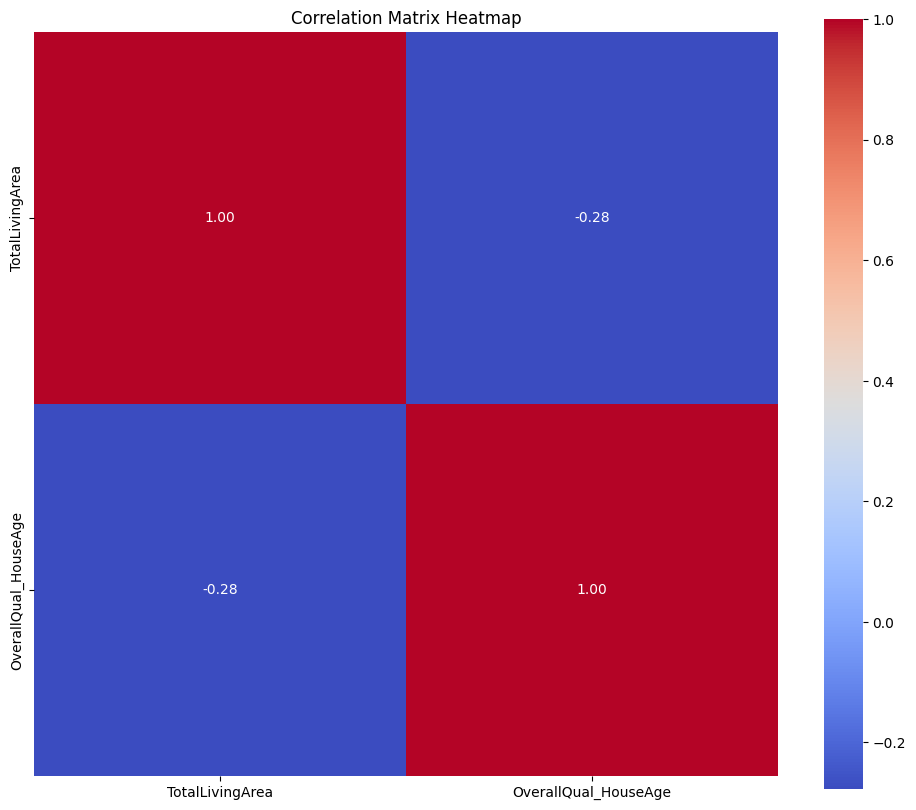

In [41]:
corrMatrix = X_train_cp.corr()
tidy_corr_matrix = corrMatrix.reset_index().melt(id_vars='index').rename(columns={'index': 'Variable 1', 'variable': 'Variable 2', 'value': 'Correlation'})
tidy_corr_matrix = tidy_corr_matrix[tidy_corr_matrix['Variable 1'] != tidy_corr_matrix['Variable 2']]

plt.figure(figsize=(12, 10))
sns.heatmap(corrMatrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

Tras realizar las modificaciones, se observa una notable disminución en la correlación entre las distintas variables de las viviendas.

In [42]:
est = sm.OLS(y_train_cp,X_train_cp)
est2 = est.fit()
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.924
Model:                            OLS   Adj. R-squared (uncentered):              0.924
Method:                 Least Squares   F-statistic:                              2574.
Date:                Sat, 02 Mar 2024   Prob (F-statistic):                   8.72e-237
Time:                        23:14:23   Log-Likelihood:                         -5277.6
No. Observations:                 423   AIC:                                  1.056e+04
Df Residuals:                     421   BIC:                                  1.057e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

Como se puede ver el $R^2$ es de 0.933 por lo que el modelo explica muy bien los datos. Por otro lado, el valor de P es menor a 0.05 por lo que podemos decir que se rechaza la hipótesis nula de que los coeficientes son 0.

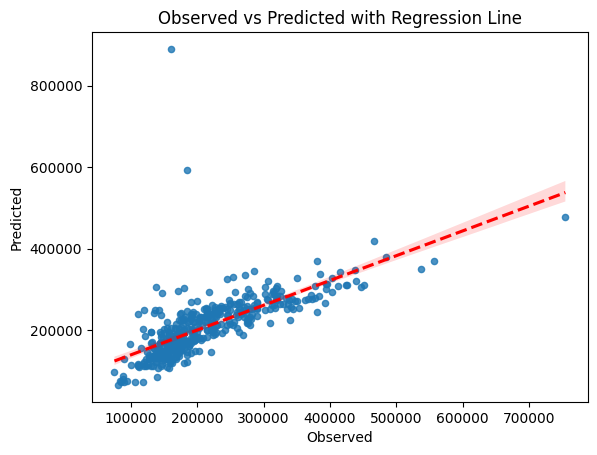

In [43]:
predicted_values = est2.predict(X_train_cp)

results_df = pd.DataFrame({'Observed': y_train_cp, 'Predicted': predicted_values})

sns.regplot(x='Observed', y='Predicted', data=results_df, scatter_kws={'s': 20}, line_kws={'color': 'red', 'linestyle': '--'})
plt.xlabel("Observed")
plt.ylabel("Predicted")
plt.title("Observed vs Predicted with Regression Line")
plt.show()

In [44]:
residuals = y_train_cp - predicted_values

Text(0.5, 1.0, 'Residuals')

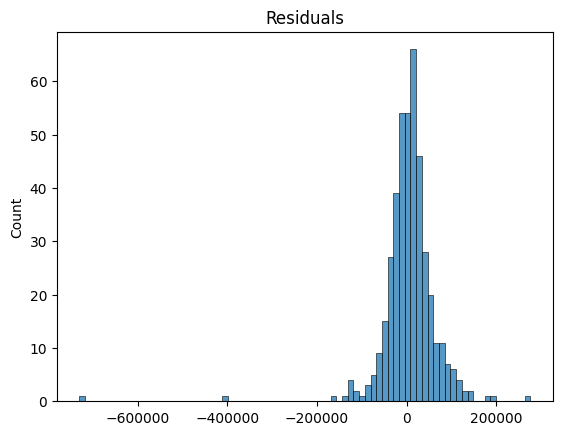

In [45]:
sns.histplot(residuals)
plt.title("Residuals")

{'whiskers': [<matplotlib.lines.Line2D at 0x24f176a8f50>,
 'caps': [<matplotlib.lines.Line2D at 0x24f176a93a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x24f176a8a10>],
 'medians': [<matplotlib.lines.Line2D at 0x24f176a9910>],
 'fliers': [<matplotlib.lines.Line2D at 0x24f176a9a90>],
 'means': []}

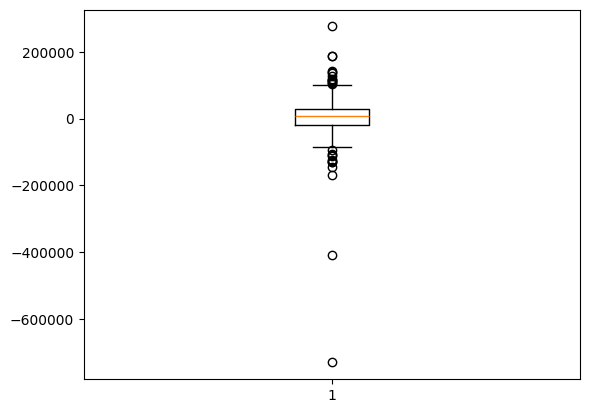

In [46]:
plt.boxplot(residuals)

In [47]:
normaltest(residuals)

NormaltestResult(statistic=431.1385986885096, pvalue=2.3957573380587728e-94)

# Regression Metrics

In [48]:
# calculate aic for regression
def calculate_aic(n, mse, num_params):
 aic = n * np.log(mse) + 2 * num_params
 return aic

# calculate bic for regression
def calculate_bic(n, mse, num_params):
 bic = n * np.log(mse) + num_params * np.log(n)
 return bic

### Univariate Model Testing

In [49]:
# Reshape y_test
y_test = y_test.values.reshape(-1, 1)

# Initialize variables to store results
test_salePrice_pred = None

# Validate the best model on the testing dataset
X_test_col = X_test[bestCol].values.reshape(-1, 1)
test_salePrice_pred = bestModel.predict(X_test_col)

# Regression metrics
explained_variance_uni = metrics.explained_variance_score(y_test, test_salePrice_pred)
mean_absolute_error_uni = metrics.mean_absolute_error(y_test, test_salePrice_pred) 
mse_uni = metrics.mean_squared_error(y_test, test_salePrice_pred) 
mean_squared_log_error_uni = metrics.mean_squared_log_error(y_test, test_salePrice_pred)
median_absolute_error_uni = metrics.median_absolute_error(y_test, test_salePrice_pred)
r2_uni = metrics.r2_score(y_test, test_salePrice_pred)
k = bestModel.coef_.size
n = X_train.shape[0]
aic_uni = calculate_aic(n,mse_uni,k)
bic_uni = calculate_bic(n,mse_uni,k)

print('explained_variance: ', round(explained_variance_uni,4))   
print('mean_squared_log_error: ', round(mean_squared_log_error_uni,4))
print('r2: ', round(r2_uni,4))
print('MAE: ', round(mean_absolute_error_uni,4))
print('MSE: ', round(mse_uni,4))
print('RMSE: ', round(np.sqrt(mse_uni),4))
print('AIC: ',round(aic_uni,4))
print('BIC: ',round(bic_uni,4))

explained_variance:  0.6126
mean_squared_log_error:  0.0647
r2:  0.6119
MAE:  40013.8035
MSE:  3515563628.7655
RMSE:  59292.1886
AIC:  9299.737
BIC:  9303.7844


### Multivariate Model Test Preprocessing

In [50]:
# Preprocess the test data
X_test_cp = X_test.copy()  # Make a copy to avoid modifying the original X_test

X_test_cp['HouseAge'] = X_test_cp['YrSold'] - X_test_cp['YearBuilt']
X_test_cp['TotalFullBathrooms'] = X_test_cp['FullBath'] + X_test_cp['BsmtFullBath']
X_test_cp['TotalHalfBathrooms'] = X_test_cp['BsmtHalfBath'] + X_test_cp['HalfBath']

X_test_cp = X_test_cp.loc[:, columnNames]

X_test_cp['TotalLivingArea'] = X_test_cp['TotalBsmtSF'] + X_test_cp['1stFlrSF'] + X_test_cp['GrLivArea']
X_test_cp['OverallQual_HouseAge'] = X_test_cp['OverallQual'] * X_test_cp['HouseAge']

# Drop the same columns as dropped in X_train_cp
X_test_cp = X_test_cp.drop(['TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'YearRemodAdd', 'YearBuilt', 'GarageCars', 'FullBath', 'TotRmsAbvGrd',
                            'OverallQual', 'HouseAge', 'GarageArea', 'TotalFullBathrooms', 'TotalHalfBathrooms', 'Fireplaces'], axis=1)

# Make predictions on the test data
y_pred = est2.predict(X_test_cp)

#### Metrics

In [51]:
# Regression metrics
explained_variance_modelo1 = metrics.explained_variance_score(y_test, y_pred)
mean_absolute_error_modelo1 = metrics.mean_absolute_error(y_test, y_pred) 
mse_modelo1 = metrics.mean_squared_error(y_test, y_pred) 
mean_squared_log_error_modelo1 = metrics.mean_squared_log_error(y_test, y_pred)
median_absolute_error_modelo1 = metrics.median_absolute_error(y_test, y_pred)
r2_modelo1 = metrics.r2_score(y_test, y_pred)
k = len(est2.params)
n = X_train_cp.shape[0]

aic_modelo1 = calculate_aic(n, mse_modelo1, k)
bic_modelo1 = calculate_bic(n, mse_modelo1, k)

print('explained_variance: ', round(explained_variance_modelo1, 4))   
print('mean_squared_log_error: ', round(mean_squared_log_error_modelo1, 4))
print('r2: ', round(r2_modelo1, 4))
print('MAE: ', round(mean_absolute_error_modelo1, 4))
print('MSE: ', round(mse_modelo1, 4))
print('RMSE: ', round(np.sqrt(mse_modelo1), 4))
print('AIC: ', round(aic_modelo1, 4))
print('BIC: ', round(bic_modelo1, 4))


explained_variance:  0.6498
mean_squared_log_error:  0.0583
r2:  0.6416
MAE:  38159.693
MSE:  3246464084.0473
RMSE:  56977.7508
AIC:  9268.052
BIC:  9276.1468


## Results